In [1]:
import numpy as np
max_time = 100 # seconds
fs = 31 # Hz
t = np.arange(0,max_time,1.0/31)
def make_wave(t):
    return 20 * np.sin(0.5 * 2*np.pi*t+np.random.rand()) + np.random.randn(len(t))

traces = np.vstack([make_wave(t) for ii in range(3)]).T

In [2]:
import pandas as pd
traces = pd.DataFrame(traces,
                      index=t,
                      columns=('neuron_1','neuron_2','neuron_3'),
                     )
traces.head()
# traces.plot()

,neuron_1,neuron_2,neuron_3
0.000000,6.828803,7.898049,3.461998
0.032258,8.680258,8.922760,4.980943
0.064516,10.330507,8.778041,6.275531
0.096774,13.992609,12.035210,8.284333
0.129032,14.360911,16.596428,11.498699


In [3]:
import neuroglia

In [4]:
events = pd.DataFrame(
    dict(
        time = [1.0,12.2,34.6],
        lbl = ['a','b','c'],
    )
)

In [5]:
tensorizer = neuroglia.TraceTensorizer(
    events,
    bins=np.arange(-0.1,0.5,0.02),
)

In [6]:
tensorizer.bins

array([ -1.00000000e-01,  -8.00000000e-02,  -6.00000000e-02,
        -4.00000000e-02,  -2.00000000e-02,   1.38777878e-17,
         2.00000000e-02,   4.00000000e-02,   6.00000000e-02,
         8.00000000e-02,   1.00000000e-01,   1.20000000e-01,
         1.40000000e-01,   1.60000000e-01,   1.80000000e-01,
         2.00000000e-01,   2.20000000e-01,   2.40000000e-01,
         2.60000000e-01,   2.80000000e-01,   3.00000000e-01,
         3.20000000e-01,   3.40000000e-01,   3.60000000e-01,
         3.80000000e-01,   4.00000000e-01,   4.20000000e-01,
         4.40000000e-01,   4.60000000e-01,   4.80000000e-01])

In [7]:
tensor = tensorizer.fit_transform(traces)

In [8]:
tensor

<xarray.DataArray (event: 3, time_from_event: 30, neuron: 3)>
array([[[ -1.012145,  -2.870167,   3.254282],
        [ -2.562017,  -2.400642,   2.260941],
        ..., 
        [-18.886716, -19.752977, -19.644892],
        [-18.499311, -19.321478, -19.901694]],

       [[ 12.601383,  12.726662,   9.464098],
        [ 12.62552 ,  13.295902,  10.361543],
        ..., 
        [ 12.634681,  11.730849,  16.568455],
        [ 11.869267,  11.845877,  14.359013]],

       [[ 19.329325,  18.576606,  20.288859],
        [ 19.163138,  17.592744,  18.484957],
        ..., 
        [-10.916187, -10.634851,  -5.802998],
        [-11.991046, -11.365372,  -7.93877 ]]])
Coordinates:
  * time_from_event  (time_from_event) float64 -0.1 -0.08 -0.06 -0.04 -0.02 ...
  * neuron           (neuron) object 'neuron_1' 'neuron_2' 'neuron_3'
    index            (event) int32 0 1 2
    lbl              (event) <U1 'a' 'b' 'c'
    time             (event) float64 1.0 12.2 34.6
  * event            (event) int64 0 1

In [9]:
extracted = tensor.where(tensor['lbl']=='a',drop=True)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

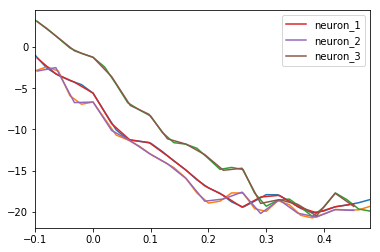

In [11]:
f,ax = plt.subplots()
ax.plot(tensorizer.bins,np.squeeze(extracted.values))
event_time = extracted['time'].values[0]
traces_extracted = traces[((traces.index>event_time+tensorizer.bins[0])&(traces.index<=event_time+tensorizer.bins[-1]))]
traces_extracted.index -= event_time
traces_extracted.plot(ax=ax)

In [22]:
tensor.where(tensor['time_from_event']>0,drop=True)

<xarray.DataArray (event: 3, time_from_event: 25, neuron: 3)>
array([[[ -5.589342,  -6.668429,  -1.240818],
        [ -7.839958,  -8.677505,  -2.416803],
        ..., 
        [-18.886716, -19.752977, -19.644892],
        [-18.499311, -19.321478, -19.901694]],

       [[ 15.088036,  17.051197,  14.804846],
        [ 17.448983,  16.046668,  16.209078],
        ..., 
        [ 12.634681,  11.730849,  16.568455],
        [ 11.869267,  11.845877,  14.359013]],

       [[ 17.288018,  14.964567,  19.363819],
        [ 16.979814,  13.895663,  18.344832],
        ..., 
        [-10.916187, -10.634851,  -5.802998],
        [-11.991046, -11.365372,  -7.93877 ]]])
Coordinates:
  * time_from_event  (time_from_event) float64 1.388e-17 0.02 0.04 0.06 0.08 ...
  * neuron           (neuron) object 'neuron_1' 'neuron_2' 'neuron_3'
    index            (event) int32 0 1 2
    lbl              (event) <U1 'a' 'b' 'c'
    time             (event) float64 1.0 12.2 34.6
  * event            (event) int64 0 

In [29]:
tensor

<xarray.DataArray (event: 3, time_from_event: 30, neuron: 3)>
array([[[ -1.012145,  -2.870167,   3.254282],
        [ -2.562017,  -2.400642,   2.260941],
        ..., 
        [-18.886716, -19.752977, -19.644892],
        [-18.499311, -19.321478, -19.901694]],

       [[ 12.601383,  12.726662,   9.464098],
        [ 12.62552 ,  13.295902,  10.361543],
        ..., 
        [ 12.634681,  11.730849,  16.568455],
        [ 11.869267,  11.845877,  14.359013]],

       [[ 19.329325,  18.576606,  20.288859],
        [ 19.163138,  17.592744,  18.484957],
        ..., 
        [-10.916187, -10.634851,  -5.802998],
        [-11.991046, -11.365372,  -7.93877 ]]])
Coordinates:
  * time_from_event  (time_from_event) float64 -0.1 -0.08 -0.06 -0.04 -0.02 ...
  * neuron           (neuron) object 'neuron_1' 'neuron_2' 'neuron_3'
    index            (event) int32 0 1 2
    lbl              (event) <U1 'a' 'b' 'c'
    time             (event) float64 1.0 12.2 34.6
  * event            (event) int64 0 1

In [28]:
tensor.mean(axis=0)

<xarray.DataArray (time_from_event: 30, neuron: 3)>
array([[ 10.306188,   9.4777  ,  11.002413],
       [  9.742214,   9.496001,  10.369147],
       [  9.338092,   9.472985,   9.733367],
       [  9.569115,   8.861601,   9.753117],
       [  9.26771 ,   8.757446,  10.499363],
       [  8.928904,   8.449112,  10.975949],
       [  8.862946,   7.088275,  10.712369],
       [  7.858461,   6.523629,   9.570483],
       [  6.477215,   6.735777,   8.218485],
       [  6.146901,   6.140345,   7.988203],
       [  6.286356,   4.965728,   8.196811],
       [  5.60612 ,   4.365741,   7.43867 ],
       [  4.386395,   4.531959,   6.440987],
       [  3.662484,   4.087557,   6.110797],
       [  3.577872,   2.62891 ,   6.00061 ],
       [  3.105507,   1.788586,   5.539284],
       [  1.608023,   1.719889,   4.371424],
       [  0.594666,   1.468113,   3.30193 ],
       [  0.934616,   0.80925 ,   2.955672],
       [  1.291514,  -0.490345,   2.190255],
       [  0.681564,  -1.166712,   1.264616],
   

In [31]:
tensor.mean(dim='event').mean(dim='neuron')

<xarray.DataArray (time_from_event: 30)>
array([ 10.2621  ,   9.869121,   9.514815,   9.394611,   9.508173,   9.451322,
         8.887864,   7.984191,   7.143826,   6.758483,   6.482965,   5.80351 ,
         5.11978 ,   4.620279,   4.069131,   3.477792,   2.566445,   1.788237,
         1.566513,   0.997141,   0.259822,  -0.35889 ,  -1.294731,  -2.101725,
        -2.528814,  -2.681242,  -3.188572,  -4.200031,  -4.967182,  -5.660391])
Coordinates:
  * time_from_event  (time_from_event) float64 -0.1 -0.08 -0.06 -0.04 -0.02 ...

In [32]:
tensor.mean(dim='event').mean(dim='neuron') > 5

<xarray.DataArray (time_from_event: 30)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)
Coordinates:
  * time_from_event  (time_from_event) float64 -0.1 -0.08 -0.06 -0.04 -0.02 ...

In [33]:
tensor.where(tensor.mean(dim='event').mean(dim='neuron') > 5,drop=True)

<xarray.DataArray (event: 3, time_from_event: 13, neuron: 3)>
array([[[ -1.012145,  -2.870167,   3.254282],
        [ -2.562017,  -2.400642,   2.260941],
        [ -3.427344,  -2.917598,   1.076841],
        [ -4.064086,  -5.909781,  -0.11386 ],
        [ -4.556457,  -6.934906,  -0.769163],
        [ -5.589342,  -6.668429,  -1.240818],
        [ -7.839958,  -8.677505,  -2.416803],
        [-10.041387, -10.673346,  -4.510008],
        [-11.194448, -11.253919,  -6.746341],
        [-11.417759, -12.013741,  -7.609383],
        [-11.662063, -13.03035 ,  -8.380122],
        [-12.672253, -13.824997, -10.362937],
        [-13.805969, -14.624099, -11.595805]],

       [[ 12.601383,  12.726662,   9.464098],
        [ 12.62552 ,  13.295902,  10.361543],
        [ 14.205279,  14.352831,  10.61594 ],
        [ 16.363751,  15.902452,  11.157655],
        [ 15.333958,  17.180059,  12.763359],
        [ 15.088036,  17.051197,  14.804846],
        [ 17.448983,  16.046668,  16.209078],
        [ 17.619

In [36]:
traces.to_xarray()

<xarray.Dataset>
Dimensions:   (index: 3100)
Coordinates:
  * index     (index) float64 0.0 0.03226 0.06452 0.09677 0.129 0.1613 ...
Data variables:
    neuron_1  (index) float64 6.829 8.68 10.33 13.99 14.36 14.44 15.82 17.78 ...
    neuron_2  (index) float64 7.898 8.923 8.778 12.04 16.6 13.34 17.44 15.08 ...
    neuron_3  (index) float64 3.462 4.981 6.276 8.284 11.5 11.76 13.66 13.39 ...

In [38]:
traces_x = traces.to_xarray()

In [41]:
traces_x['neuron_1']>0

<xarray.DataArray 'neuron_1' (index: 3100)>
array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)
Coordinates:
  * index    (index) float64 0.0 0.03226 0.06452 0.09677 0.129 0.1613 0.1935 ...

In [42]:
mask = traces_x['neuron_1']>0

In [44]:
traces_x.where(mask,drop=True)

<xarray.Dataset>
Dimensions:   (index: 1547)
Coordinates:
  * index     (index) float64 0.0 0.03226 0.06452 0.09677 0.129 0.1613 ...
Data variables:
    neuron_1  (index) float64 6.829 8.68 10.33 13.99 14.36 14.44 15.82 17.78 ...
    neuron_2  (index) float64 7.898 8.923 8.778 12.04 16.6 13.34 17.44 15.08 ...
    neuron_3  (index) float64 3.462 4.981 6.276 8.284 11.5 11.76 13.66 13.39 ...

In [46]:
traces_x['neuron_2'].where(mask,drop=True)

<xarray.DataArray (index: 1547)>
array([ 7.898049,  8.92276 ,  8.778041, ...,  3.521183,  4.855205,  5.745158])
Coordinates:
  * index    (index) float64 0.0 0.03226 0.06452 0.09677 0.129 0.1613 0.1935 ...